In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Paradoxo de Simpson

Uma surpresa não incomum ao analisar dados é o Paradoxo de Simpson, no qual as correlações podem ser enganosas (ou *misleading*) quando variáveis confusas (ou *confounding variables*) são ignoradas.

Por exemplo, imagine que você pode identificar todos os membros  do *DataSciencester* como cientistas de dados da Costa Leste ou cientistas de dados da Costa Oeste. Você decide examinar quais cientistas de dados são mais amigáveis:


|Costa|# de membros|# médio de amigos|
| :-: | :-: | :-: |
|Oeste|101|8.2|
|Leste|103|6.5|

Certamente parece que os cientistas de dados da Costa Oeste são mais amigáveis do que os cientistas de dados da Costa Leste. Seus colegas de trabalho avançam todos os tipos de teorias sobre por que isso pode ser: talvez seja o sol, ou o café, ou os produtos orgânicos, ou a vibração descontraída do Pacífico?

Ao brincar com os dados, você descobre algo muito estranho. Se você olhar apenas para pessoas com PhDs, os cientistas de dados da Costa Leste têm mais amigos, em média. E se você olhar apenas para pessoas sem PhDs, os cientistas de dados da Costa Leste também têm mais amigos em média!


|Costa|PhD?|# de membros|# médio de amigos|
| :-: | :-: | :-: | :-: |
|Oeste|Sim|35|3.1|
|Leste|Sim|70|3.2|
|Oeste|Não|66|10.9|
|Leste|Não|33|13.4|

Depois de contabilizar se os usuários tem PhDs ou não, a correlação vai na direção oposta! Separar os dados somente entre Costa Leste e Costa Oeste escondeu o fato de que há muito mais cientistas de dados na Costa Leste com PhD (proporcionalmente) que na Costa Oeste.

Esse fenômeno surge no mundo real com alguma regularidade. A questão-chave é que a correlação está medindo a relação entre suas duas variáveis **sendo tudo o mais igual**. Se suas classes de dados são atribuídas aleatoriamente, como elas podem ser em um experimento bem projetado, "tudo o mais sendo igual" pode não ser uma suposição terrível. Mas quando há um padrão mais profundo para atribuições de classe, "tudo o mais sendo igual" pode ser uma suposição terrível. Nesse exemplo, se a proporção de cientistas de dados com PhD fosse igual na Costa Leste e Costa Oeste, então "ter PhD" deixaria de ser um fator de confusão para a variável "número médio de amigos".

Assim, a única maneira real de evitar fatores de confusão é conhecer seus dados e fazer o que puder para garantir que você tenha verificado tais fatores. Obviamente, isso nem sempre é possível. Se você não tivesse nos seus dados o nível educacional desses 200 cientistas de dados, você poderia simplesmente concluir que havia algo inerentemente mais sociável na Costa Oeste.

O Paradoxo de Simpson também pode ser observado na taxa de sobrevivência do [naufrágio do RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic). Havia uma estimativa de 2.224 passageiros e tripulantes a bordo, e mais de 1.500 morreram, tornando-se um dos mais mortais desastres marítimos comerciais em tempos de paz da história moderna. Dados sobre os passageiros podem ser baixados [aqui](https://ww2.amstat.org/publications/jse/v3n3/datasets.dawson.html). Este conjunto de dados foi processado por mim e transformado em um arquivo [csv](https://www.dropbox.com/s/vk8jf0wyczqxkvv/survival_titanic.csv?dl=0), que é muito mais fácil de tratar que um arquivo texto. Informações sobre ele podem ser lidas [aqui](https://www.dropbox.com/s/xpjw74khyqx9ww4/survival_titanic.README.txt?dl=0).

Embora muitas outras informações existam sobre os passageiros, aqui vamos trabalhar com apenas quatro:

1) Se o passageiro sobreviveu;
2) A classe do seu bilhete (primeira, segunda ou terceira) ou se ele era membro da tripulação;
3) O sexo do passageiro;
4) E se ele era um adulto ou uma criança.

Primeiro, vamos carregar os dados:

In [ ]:
import pandas as pd
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/15-Correlacao/survival_titanic.csv')
df

,class,Age,Sex,Survived
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
2196,0,1,0,1
2197,0,1,0,1
2198,0,1,0,0
2199,0,1,0,0


Se você leu o arquivo explicativo, viu que os dados estão organizados da seguinte maneira:

|Coluna|Descrição|Valores|
| :-: | :-: | :-: |
|0|Classe| 0 = tripulação, 1 = primeira, 2 = segunda, 3 = terceira|
|1|Idade|1 = adulto, 0 = criança|
|2|Sexo|1 = masculino, 0 = feminino|
|3|Sobreviveu?|1 = sim, 0 = não|

Agora vamos montar uma tabela de contigência na mão. Para tal, vamos calcular a fração de pessoas que sobreviveram por classe. Podemos aplicar o group-by na classe e tirar a média. Lembrando que a média de 1s e 0s captura uma fração.

**Exercício 1**: use a função `groupby` do `Pandas` para calcular e exibir essa fração.

In [ ]:
#Seu código aqui:

colunas = ['Survived', 'class'] #completar
coluna_groupby = 'class' #completar
df[colunas].groupby(coluna_groupby).mean()

,Survived
class,
0,0.239548
1,0.624615
2,0.414035
3,0.252125


Aparentemente, a classe dos tripulantes (classe 0) é aquela com menor taxa de sobrevivência. Para verificar se o Paradoxo de Simpson ocorre, vamos quebrar a análise pelas outras duas colunas, idade (`Age`) e sexo (`Sex`). Para isso, basta agrupar a taxa de sobrevivência pelas duas colunas de interesse.

Primeiro, vamos quebrar pela idade.

**Exercício 2**: use a função `groupby` do `Pandas` para calcular e exibir essa fração quebrada por idade (`Age`).

In [ ]:
#Seu código aqui:

colunas = ['Survived', 'Age'] #completar
colunas_groupby = ['Age'] #completar
df[colunas].groupby(colunas_groupby).mean()

,Survived
Age,
0,0.522936
1,0.312620


A única coisa que podemos ver aqui é que a taxa de sobrevivência de crianças é significativamente maior. Talvez se tivéssemos uma quantidade significativa de crianças, poderíamos observar o Paradoxo de Simpson.

Vamos agora quebrar por sexo.

**Exercício 3**: use a função `groupby` do `Pandas` para calcular e exibir essa fração quebrada por sexo (`Sex`).

In [ ]:
#Seu código aqui:

colunas = ['Survived', 'Sex'] #completar
colunas_groupby = ['Sex'] #completar
df[colunas].groupby(colunas_groupby).mean()

,Survived
Sex,
0,0.731915
1,0.212016


Quebrando a análise por sexo, podemos ver também que a taxa de sobrevivência de mulheres foi significativamente maior que a taxa de sobrevivência de homens. Além disso, por haver muito mais mulheres na terceira classe que na tripulação, isso mascarou o primeiro resultado, que indicava que membros da tripulação sobreviveram menos que os membros da terceira classe. Podemos ver agora que os membros da tripulação sobreviveram mais que os membros da terceira classe, o que configura o Paradoxo de Simpson.

**Exercício 4**: Para você confiar ainda mais nessa análise, observe a quantidade de pessoas de cada sexo por classe e note que há uma proporção muito menor de mulheres na classe `0` que na classe `3`.

In [ ]:
df[['Sex', 'class', 'Survived']].groupby(by=['class', 'Sex']).count()

Survived
class Sex          
0     0          23
      1         862
1     0         145
      1         180
2     0         106
      1         179
3     0         196
      1         510

In [ ]:
#Seu código aqui:
df[['Sex', 'class']].groupby(by=['class']).mean()

,Sex
class,
0,0.974011
1,0.553846
2,0.628070
3,0.722380


## Valores-p de Correlações

Alguns pacotes, como o `scipy`, também calculam **valores-p** (ou *p-values*) de correlações. Esse valor-p refere-se à probabilidade da correlação ser explicada pela hipótese **H0** abaixo em detrimento da hipótese **H1**:

- **H0**: A correlação observada pode ser fruto do acaso, ou seja, é estatisticamente explicada por uma permutações aleatórias nos dados.
- **H1**: A correlação observada não é fruto do acaso, ou seja, permutações dos dados não podem gerar dados correlacionados dessa maneira.


**Exercício 5**: Crie uma função que recebe dois *arrays numpy* e retorna a correlação de Pearson entre eles.

In [ ]:
#seu codigo aqui:

def correlation(x, y):
    media_x = x.mean()
    media_y = y.mean()

    covariancia_x_y = ((x - media_x) * (y - media_y)).sum()

    variancia_x = ((x - media_x) ** 2).sum()
    variancia_y = ((y - media_y) ** 2).sum()

    correlacao_pearsons = covariancia_x_y / np.sqrt(variancia_x * variancia_y)
    return correlacao_pearsons

In [ ]:
from scipy.stats import pearsonr
x = np.array([7.1, 7.1, 7.2, 8.3, 9.4])
y = np.array([2.8, 2.9, 2.8, 2.6, 3.5])
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.673


In [ ]:
x = np.array([7.1, 7.1, 7.2, 8.3, 9.4])
y = np.array([2.8, 2.9, 2.8, 2.6, 3.5])
correlation(x, y)

0.6732254696830964


Observe como os dados abaixo tem uma correlação quase que perfeita!

correlação entre x e y: 0.6732254696830964


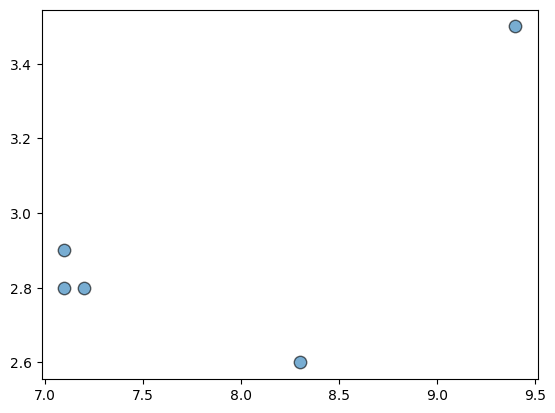

In [ ]:
x = np.array([7.1, 7.1, 7.2, 8.3, 9.4])
y = np.array([2.8, 2.9, 2.8, 2.6, 3.5])
plt.scatter(x, y, edgecolor='k', alpha=0.6, s=80)
print("correlação entre x e y:", correlation(x, y))

No entanto, se permutarmos esses dados 10000 vezes...

In [ ]:
#copia x para x_perm
x_perm = x.copy()
#vamos guardar os valores das correlações
perm_corr = []
for _ in range(10000):
    #permuta o vetor x
    np.random.shuffle(x_perm)
    #calcula a correlação e guarda no vetor perm_corr
    perm_corr.append(correlation(x_perm, y))



Temos agora 10000 valores de correlações, que foram calculadas a partir de permutações do vetor `x` original. Será que apenas o `x` original era correlacionado com `y`?

Text(0.6732254696830964, 2000, 'Observado')

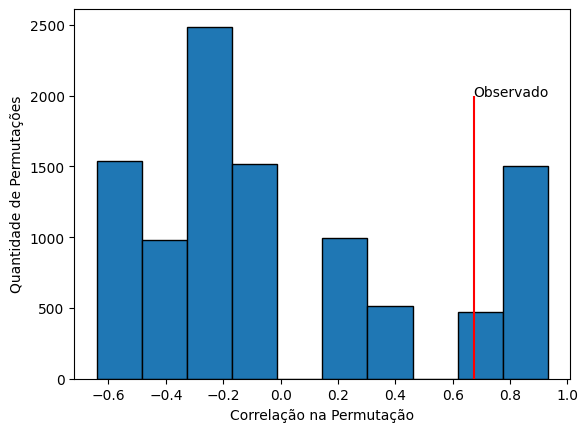

In [ ]:
plt.hist(perm_corr, edgecolor='k')
plt.xlabel('Correlação na Permutação')
plt.ylabel('Quantidade de Permutações')
plt.vlines(correlation(x, y), 0, 2000, color='r')
plt.text(correlation(x, y), 2000, 'Observado')


Podemos calcular agora quantos desses valores de correlações, gerados ao acaso, são maiores ou iguais ao valor observado:

In [ ]:
valor_p = sum(perm_corr > correlation(x, y)) / len(perm_corr)
print("valor_p", valor_p)

valor_p 0.1642


Vamos calcular a correlação e o valor-p a partir do `scipy`:

In [ ]:
from scipy import stats as ss

In [ ]:
c, p = ss.pearsonr(x, y)
print(c, p)

0.6732254696830964 0.21290226393666128


A conclusão é que, de fato, a correlação entre x e y pode ser uma correlação espúria, ou seja, vinda do acaso. O valor-p indica que há uma alta probabilidade de conseguirmos uma correlção tão alta quanto a observada.

## Algumas Outras Advertências Correlacionais

Uma correlação de zero indica que não há relação linear entre as duas variáveis. No entanto, outros tipos de relacionamentos podem existir. Por exemplo, se:

`x = [-2, -1, 0, 1, 2]`

`y = [ 2, 1, 0, 1, 2]`

então `x` e `y` têm correlação zero. Mas eles certamente têm um relacionamento - cada elemento de `y` é igual ao valor absoluto do elemento correspondente de `x`. O que eles não têm é um relacionamento em que saber como `x_i` se compara à média de `x` (`mean(x)`) nos fornece informações sobre como `y_i` se compara à média de `y` (`mean(y)`). Esse é o tipo de relacionamento que a correlação procura.

Além disso, a correlação não informa nada sobre o tamanho do relacionamento. As variáveis:

`x = [-2, 1, 0, 1, 2]`

`y = [99.98, 99.99, 100, 100.01, 100.02]`

são perfeitamente correlacionados, mas (dependendo do que você está medindo) é bem possível que esse relacionamento não seja tão interessante.

## Correlação e Causalidade

Você provavelmente já ouviu, em algum momento, que "correlação não é causalidade", provavelmente por alguém que olha dados que representam um desafio para partes de sua visão de mundo que ele estava relutante em questionar. No entanto, este é um ponto importante - se `x` e `y` estão fortemente correlacionados, isso pode significar que `x` causa `y`, `y` causa `x`, que cada um causa o outro, que algum terceiro fator causa ambos, ou pode não significar nada.

Considere a relação entre `numero_amigos` e `minutos_diarios`. É possível que ter mais amigos no site faça com que os usuários do *DataSciencester* passem mais tempo no site. Este pode ser o caso se cada amigo publicar uma certa quantidade de conteúdo por dia, o que significa que quanto mais amigos você tiver, mais tempo levará para se manter atualizado a respeito das publicações deles.

No entanto, também é possível que quanto mais tempo você gasta discutindo nos fóruns do *DataSciencester*, mais você encontra e faz amizade com pessoas que pensam como você. Ou seja, passar mais tempo no site faz com que os usuários tenham mais amigos.

Uma terceira possibilidade é que os usuários mais apaixonados por ciência dos dados passem mais tempo no site (porque acham isso a coisa mais interessante do dia) e façam mais ativamente amigos que gostam de ciência de dados (porque não querem se associar a ninguém mais).

Uma maneira de se sentir mais confiante sobre a causalidade é conduzir estudos randomizados. Se você puder dividir seus usuários aleatoriamente em dois grupos com dados demográficos semelhantes e dar a um dos grupos uma experiência levemente diferente, então você poderá muitas vezes dizer que essa leve experiência está causando os diferentes resultados.

Por exemplo, se você não se importa em ser acusado de fazer experiências com seus usuários, você pode escolher aleatoriamente um subconjunto de usuários e mostrar a eles apenas uma fração de seus amigos. Se esse subconjunto subsequentemente passou menos tempo no site, isso lhe daria alguma confiança de que ter mais amigos causa mais tempo no site.

## Para explorações futuras

* [`SciPy`](https://www.scipy.org/), [`pandas`](https://pandas.pydata.org/) e [`StatsModels`](https://www.statsmodels.org/stable/index.html) vêm com uma ampla variedade de funções estatísticas.

* Estatísticas são *importantes*. (Ou talvez as estatísticas *sejam* importantes?) Se você quer ser um bom cientista de dados, seria uma boa idéia ler um livro de estatísticas. Muitos estão disponíveis gratuitamente online. Dois exemplos:
 - [*OpenIntro Statistics*](https://www.openintro.org/stat/textbook.php)
 - [*OpenStax Introductory Statistics*](https://openstax.org/details/introductory-statistics)

## Dados Reais

Nesta aula vamos utilizados dados de preços de carros híbridos. Nos EUA, um carro híbrido pode rodar tanto em eletricidade quanto em combustível. A tabela contém as vendas de 1997 até 2003.

Uma máxima dessa aula será: **Sempre visualize seus dados**.

As colunas são:

1. **vehicle:** modelo do carro
1. **year:** ano de manufatura
1. **msrp:** preço sugerido em 2013 e em USDs
1. **acceleration:** aceleração em km por hora por segundo
1. **mpg:** economia de combustível em milhas por galão
1. **class:** a classe do modelo

### Olhando para os Dados

Vamos iniciar olhando para cada coluna dos dados.

In [ ]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/15-Correlacao/hybrid.csv')
df['msrp'] = df['msrp'] / 1000
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24.50974,7.46,41.26,Compact
1,Tino,2000,35.35497,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26.83225,7.97,45.23,Compact
3,Insight,2000,18.93641,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25.83338,7.04,47.04,Compact


A coluna MSRP é o preço médio de venda. Cada linha da tabela é um carro.

Vamos ver o histograma da aceleração:

Text(0, 0.5, 'Num. Carros')

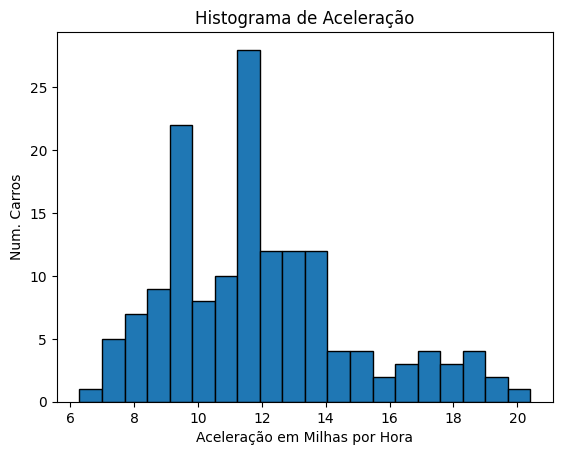

In [ ]:
plt.hist(df['acceleration'], bins=20, edgecolor='k')
plt.title('Histograma de Aceleração')
plt.xlabel('Aceleração em Milhas por Hora')
plt.ylabel('Num. Carros')

Agora vamos ver o histograma do preço sugerido:

Text(0, 0.5, 'Num. Carros')

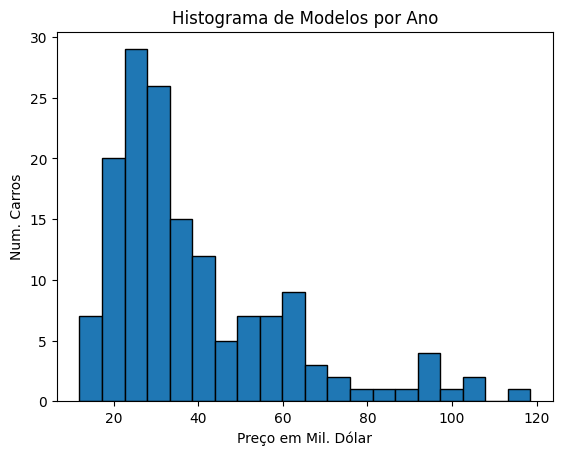

In [ ]:
plt.hist(df['msrp'], bins=20, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Preço em Mil. Dólar')
plt.ylabel('Num. Carros')


Os gráficos acima nos dão uma visão geral dos dados. Note que, como esperado, cada coluna tem uma faixa diferente de valores no eixo-x. Além do mais, a concentração (lado esquerdo/direito) diferente entre as colunas. Como que podemos comparar as colunas? Cada uma está representada em uma unidade diferente.

Vamos fazer os gráficos de dispersão.

### Dispersão

Começamos com o gráfico que compara aceleração com o preço:

Text(0.5, 1.0, 'Consumo vs Acc')

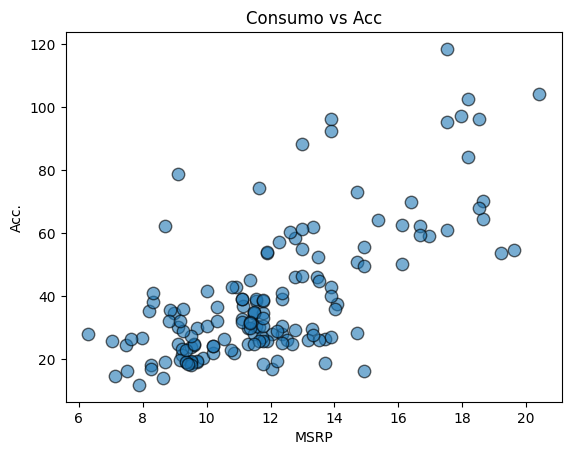

In [ ]:
plt.scatter(df['acceleration'], df['msrp'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MSRP')
plt.ylabel('Acc.')
plt.title('Consumo vs Acc')

Tudo indica que há uma correlação entre os dois valores.

**Exercício 6**: calcule a correlação entre aceleração e preço. Indique se a correlação é significativa ou não através do seu valor-p.

In [ ]:
#Seu código aqui:
valores_aceleracao = df['acceleration'].values
valores_preco = df['msrp'].values

valor_correlacao_observado = correlation(valores_aceleracao, valores_preco)

print(f"Correlação de aceleração e preço {valor_correlacao_observado}")

Correlação de aceleração e preço 0.6955778996913978


In [ ]:
QUANTIDADE_TESTES = 10000

permutacao_aceleracao = valores_aceleracao.copy()
correlacoes_permutacao = np.zeros(QUANTIDADE_TESTES)

for i in range(QUANTIDADE_TESTES):
    np.random.shuffle(permutacao_aceleracao)
    correlacoes_permutacao[i] = correlation(permutacao_aceleracao, valores_preco)

correlacoes_permutacao

array([-0.10452011,  0.09002159, -0.04718639, ..., -0.0401077 ,
       -0.0743691 ,  0.08673063])

Text(0.6955778996913978, 2000, 'Observado')

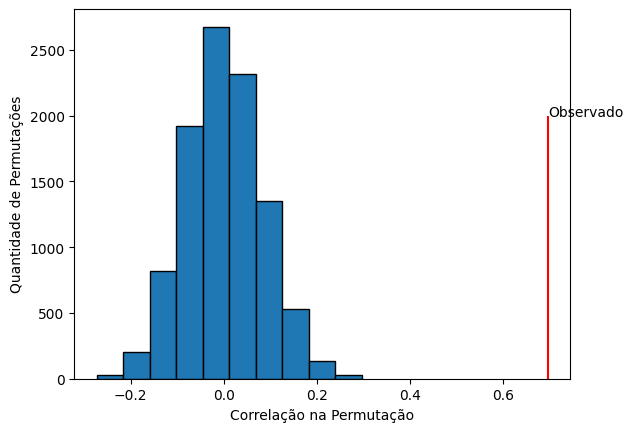

In [ ]:
plt.hist(correlacoes_permutacao, edgecolor='k')
plt.xlabel('Correlação na Permutação')
plt.ylabel('Quantidade de Permutações')
plt.vlines(correlation(valores_aceleracao, valores_preco), 0, 2000, color='r')
plt.text(correlation(valores_aceleracao, valores_preco), 2000, 'Observado')

In [ ]:
valor_p = sum(correlacoes_permutacao > correlation(x, y)) / len(correlacoes_permutacao)
print(f"valor-p: {valor_p}")

valor-p: 0.0


In [ ]:
c, p = ss.pearsonr(valores_aceleracao, valores_preco)
print(c, p)

0.6955778996913979 1.915800066712843e-23


Nesse caso o valor-p indica que a relação entre as duas não pode ser explicada pelo acaso, uma vez que o valor-p indica uma probabilidade baixa.

Finalmente, o pairplot no Seaborn permite que você veja gráficos de dispersão e histogramas para várias colunas em uma tabela. Aqui brincamos com algumas das palavras-chave para produzir um gráfico de pares mais sofisticado e fácil de ler que incorpora linhas de mistura alfa e regressão linear para os gráficos de dispersão.

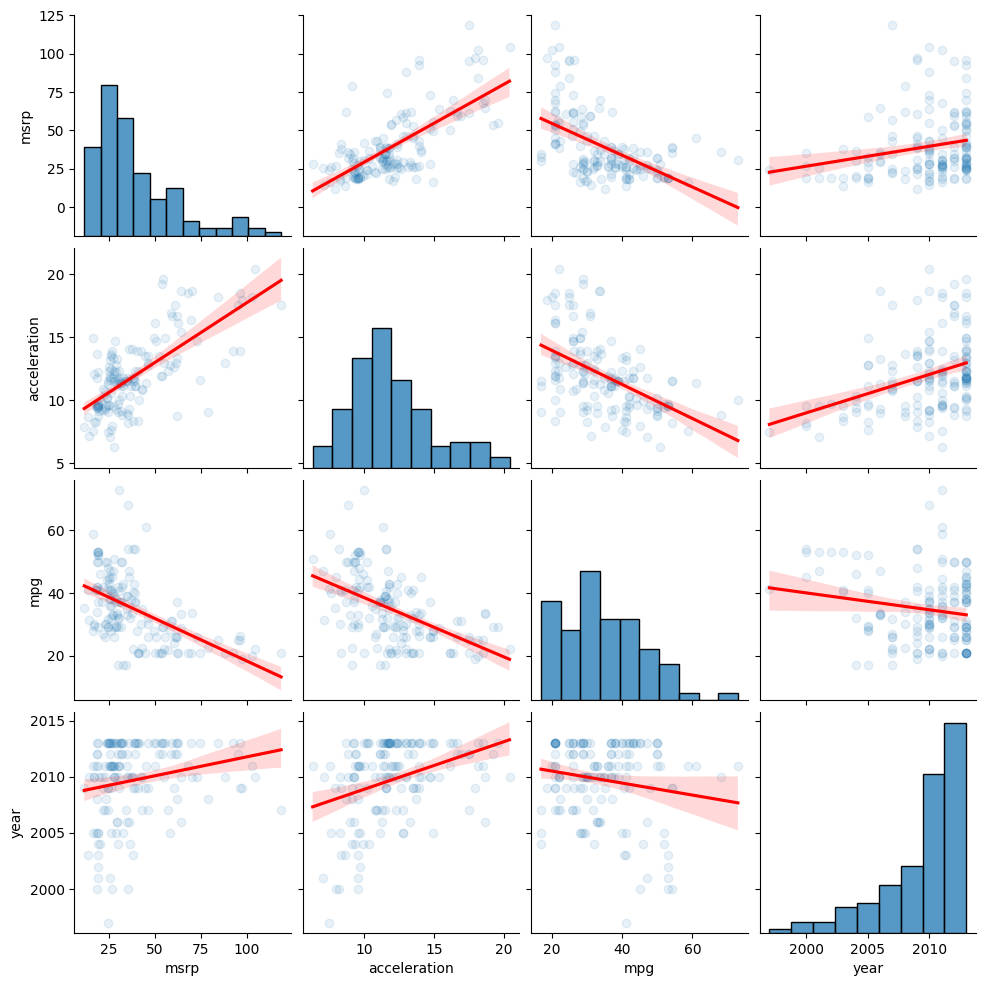

In [ ]:
import seaborn as sns
sns.pairplot(df[['msrp', 'acceleration', 'mpg', 'class', 'year']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Você pode também calcular a matriz de correlações entre todas as colunas de um `DataFrame` usando a função `corr`:

In [ ]:
df.corr()

<ipython-input-284-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,msrp,acceleration,mpg
year,1.000000,0.209786,0.359429,-0.169938
msrp,0.209786,1.000000,0.695578,-0.531826
acceleration,0.359429,0.695578,1.000000,-0.506070
mpg,-0.169938,-0.531826,-0.506070,1.000000


Essa função calcula a correlação de `Pearson`, mas você pode calcular a de `Spearman`.

In [ ]:
df.corr(method='spearman')

<ipython-input-285-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,year,msrp,acceleration,mpg
year,1.000000,0.235469,0.355990,-0.086561
msrp,0.235469,1.000000,0.611802,-0.575984
acceleration,0.355990,0.611802,1.000000,-0.533281
mpg,-0.086561,-0.575984,-0.533281,1.000000


# Exercício Final

O professor disponibilizou uma planilha com as notas finais dos alunos que cursaram a disciplina *Programação e Desenvolvimento de Software - 1* da UFMG [neste link](https://drive.google.com/file/d/1Bm5mKv5FHHfaFycuVufV8FBWnk1Dh267/view?usp=sharing). Faça o download desse arquivo para realizar este exercício.


A planilha contém as seguintes informações:

- **Aluno**: código anonimizado do número de matrícula do aluno.
- **Praticas**: pontuação (no intervalo entre 0 e 5) obtida pelo aluno nas atividades práticas semanais. É uma forma de quantificar a *quantidade de horas* dedicada para a disciplina.
- **Ano**: ano em que a disciplina foi cursada.

### Objetivos do exercício:

1) Verificar se há correlação entre os pontos obtidos nas atividades práticas e a nota final.
2) Verificar se há diferenças entre as correlação do ano 2020 com a do ano 2021.
2) Verificar se as correlações mudam ao remover os alunos que desistiram do curso.

**Importante**: não se esqueça de lidar com os valores faltantes!

In [ ]:
df_alunos = pd.read_csv('notas_pds1.csv',delimiter=',',header='infer')
df_alunos.head()

,Aluno,Praticas,Nota,Ano
0,322dc9c2578ab8e6e9148cc8aa13e852,NaN,0,2021
1,ad229fb205bc55f579fb585d822e6a62,4,"49,96",2021
2,d0ca98e1af20d4bc4c471ae3c73c8ffd,NaN,0,2021
3,c4d14e39372b7c44ba0c58cc730562ce,NaN,0,2021
4,fef5f1f3a5b6681347d75525201b4ad2,4,"34,85845",2021


Verifique se há valores faltantes com a função `info()`.

In [ ]:
#Seu código aqui:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Aluno     536 non-null    object
 1   Praticas  414 non-null    object
 2   Nota      536 non-null    object
 3   Ano       536 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 16.9+ KB


Troque os valores nulos por `0`.

In [ ]:
#Seu código aqui:
df_alunos = df_alunos.fillna(0)
df_alunos

,Aluno,Praticas,Nota,Ano
0,322dc9c2578ab8e6e9148cc8aa13e852,0,0,2021
1,ad229fb205bc55f579fb585d822e6a62,4,"49,96",2021
2,d0ca98e1af20d4bc4c471ae3c73c8ffd,0,0,2021
3,c4d14e39372b7c44ba0c58cc730562ce,0,0,2021
4,fef5f1f3a5b6681347d75525201b4ad2,4,"34,85845",2021
...,...,...,...,...
531,696cf7bb0e2fb61883ceeaa597df205d,0,0,2020
532,ce92d8c64aebc41957f7983b2beb1e81,"1,5","30,29",2020
533,72c056ad877ac40203a59a85bb1165a3,0,"7,94",2020
534,c06e04231e1c42cddd451f50c4592a54,0,"6,18",2020


In [ ]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Aluno     536 non-null    object
 1   Praticas  536 non-null    object
 2   Nota      536 non-null    object
 3   Ano       536 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 16.9+ KB


Os valores das colunas `Aluno`, `Praticas` e `Nota` estão com o tipo `object` e também com o caractere `,` separando a parte inteira da parte decimal. Substitua as `,` por `.` usando a função `str.replace` do `Pandas` e, depois, use a função `astype(float)` para converter os tipos para `float`.

In [ ]:
#Seu código aqui:
df_alunos['Nota'] = df_alunos['Nota'].str.replace(',', '.').astype(float)
df_alunos['Praticas'] = df_alunos['Praticas'].str.replace(',', '.').astype(float)

df_alunos = df_alunos.fillna(0)
df_alunos

,Aluno,Praticas,Nota,Ano
0,322dc9c2578ab8e6e9148cc8aa13e852,0.0,0.00000,2021
1,ad229fb205bc55f579fb585d822e6a62,4.0,49.96000,2021
2,d0ca98e1af20d4bc4c471ae3c73c8ffd,0.0,0.00000,2021
3,c4d14e39372b7c44ba0c58cc730562ce,0.0,0.00000,2021
4,fef5f1f3a5b6681347d75525201b4ad2,4.0,34.85845,2021
...,...,...,...,...
531,696cf7bb0e2fb61883ceeaa597df205d,0.0,0.00000,2020
532,ce92d8c64aebc41957f7983b2beb1e81,1.5,30.29000,2020
533,72c056ad877ac40203a59a85bb1165a3,0.0,7.94000,2020
534,c06e04231e1c42cddd451f50c4592a54,0.0,6.18000,2020


Calcule a correção entre a coluna `Praticas` e `Nota` usando a função `corr` do Pandas.

In [ ]:
#Seu código aqui:
correlacao = df_alunos['Praticas'].corr(df_alunos['Nota'])
correlacao

0.863587293309461

Por fim, encontre as colunas que correspondem aos alunos que fizeram a disciplina em 2020 e também em 2021. Use a expressão `idx_ano = df["coluna"] == ano` para encontrar esses índices. Depois, calcule a correção nesses anos.

In [ ]:
def calcular_correlacao_ano(col_x, col_y, df, ano):
  df_alunos_ano = df[df['Ano'] == ano]
  correlacao_ano = df[col_x].corr(df[col_y])
  return correlacao_ano

In [ ]:
#Seu código aqui:
correlacao_2020 = calcular_correlacao_ano('Praticas', 'Nota', df_alunos, 2020)
correlacao_2021 = calcular_correlacao_ano('Praticas', 'Nota', df_alunos, 2021)

print(f"Correlação de 2020: {correlacao_2020}")
print(f"Correlação de 2021: {correlacao_2021}")

Correlação de 2020: 0.863587293309461
Correlação de 2021: 0.863587293309461


Como exercício final, remova todos os alunos desistentes e calcule as correlações novamente. Os alunos desistentes são aqueles que ficaram com `Nota` menor que `1`. Para isso, use a função `drop` do Pandas.

In [ ]:
#Seu código aqui:
df_alunos_nao_desistentes = df_alunos.drop(df_alunos[df_alunos['Nota'] < 1].index)

correlacao_nao_desistentes_2020 = calcular_correlacao_ano('Praticas', 'Nota', df_alunos_nao_desistentes, 2020)
correlacao_nao_desistentes_2021 = calcular_correlacao_ano('Praticas', 'Nota', df_alunos_nao_desistentes, 2021)

print(f"Correlação de 2020: {correlacao_nao_desistentes_2020}")
print(f"Correlação de 2021: {correlacao_nao_desistentes_2021}")

Correlação de 2020: 0.6695072443426616
Correlação de 2021: 0.6695072443426616
